<a href="https://colab.research.google.com/github/Shiiiin/Machine-Learning-Tutorials/blob/master/MNIST_FCC3_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목적
- 프로그램밍에 대해서 전혀 모르는 분들도 딥러닝을 '느낄' 수 있도록 하는 것이 목적입니다. 
- 프로그래밍 언어에 대한 설명은 가능한 생략합니다.
- 수학적인 내용에 대해서 가능한 생략합니다.
- 다양한 모델에 대해서 성능이 어떻게 바뀌는지 '체감'하는 것이 목적입니다. 

# 입력 데이터 읽어오기

In [0]:
from keras.models import Sequential  
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from keras.utils import np_utils   # Keras에서 필요한 library를 import 합니다.

import numpy as np # python에서 numpy

np.random.seed(777)  # 랜덤 시드. 실행할때마다 같은 결과가 나오게 하기 위해서 필요합니다.




Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

nb_classes = 10  # 0,1...., 8, 9 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

**그림을 그려봅시다.**

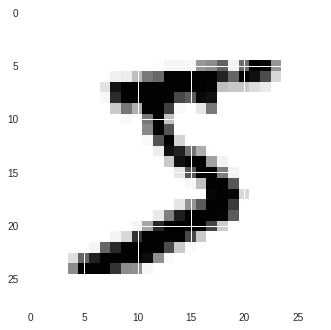

y =  5


In [0]:


import matplotlib.pyplot as plt

id = 0

plt.imshow(x_train[id])
plt.show()

print('y = ', y_train[id])

실제 데이터는 어떻게 생겼을까요??

In [0]:
for x in x_train[0]:
  for i in x:
    print('{:3} '.format(i), end='') 
  print()
# http://snowdeer.github.io/machine-learning/2018/01/09/recognize-mnist-data/


  
  

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 


#데이터 전처리

다양한 형태의 데이터를 우리가 설계한 네트워크에 맞게 변형하는 것이 필요합니다.
딥러닝은 숫자형태만 처리가 가능하므로 문자는 적절한 숫자로 변경시켜 줍니다. (encoding)
또한, 설계한 네트워크의 형태에 맞게 자료의 크기를 맞춰주는 작업이 필요합니다. 

MNIST 예제에서는 

- 이미지 데이터 (입력)은 1D vector로 변환시켜 줍니다.
- 정답 lable (0,1,2,3...,9)는 각각의 숫자의 확률로 변환시켜 줍니다. 

  0 -> [1,0,0,0.....]
  
  1 -> [0,1,0,0.....]





In [0]:

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train = x_train.astype('float32') / 255
# one_hot
y_train = np_utils.to_categorical(y_train, nb_classes) 

In [0]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test = x_test.astype('float32') / 255
# one_hot
y_test = np_utils.to_categorical(y_test, nb_classes)

# 모델정의

In [0]:
activation = 'sigmoid' # activation 함수: relu, sigmoid 등


model = Sequential()

model.add(Dense(10, input_dim=784))      # MNIST data image of shape 28 * 28 = 784
model.add(Activation('softmax'))  # 출력값(확률)의 합을 1로 만들어 줍니다. 


Instructions for updating:
Colocations handled automatically by placer.


model.add(Dense(500))


model.add(Activation(activation))


model.add(Dropout(0.25))



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',    # mean square error, mean absolute error 등 사용 가능
              optimizer='sgd',                                       # 최적화 알고리즘, sgd, adam 등등
              metrics=['accuracy'])                               # 모델 성능을 평가하기 위한 척도입니다. Loss는 최적화를 수행하기 위하여 continuous한 함수로 정의가 되어야 합니다. 반면 정혹도는 맞느냐 틀리느냐로 결정됩니다. 

loss : mean square error, mean absolute error 등 사용 가능
 
Optimizer: 최적화 알고리즘, sgd, adam 등등
 
Metric : 모델 성능을 평가하기 위한 척도입니다. Loss는 최적화를 수행하기 위하여 continuous한 함수로 정의가 되어야 합니다. 반면 정혹도는 맞느냐 틀리느냐로 결정됩니다.

In [0]:
history = model.fit(x_train, y_train, epochs=15, batch_size=256)
score = model.evaluate(x_test, y_test)
print('\nAccuracy:', score[1])


Instructions for updating:
Use tf.cast instead.
Epoch 1/15
60000/60000 [==============================] - 1s 13us/step - loss: 1.6177 - acc: 0.5905
Epoch 2/15
60000/60000 [==============================] - 1s 11us/step - loss: 0.9678 - acc: 0.7996
Epoch 3/15
60000/60000 [==============================] - 1s 11us/step - loss: 0.7664 - acc: 0.8313
Epoch 4/15
60000/60000 [==============================] - 1s 11us/step - loss: 0.6680 - acc: 0.8455
Epoch 5/15
60000/60000 [==============================] - 1s 11us/step - loss: 0.6083 - acc: 0.8544
Epoch 6/15
60000/60000 [==============================] - 1s 11us/step - loss: 0.5675 - acc: 0.8604
Epoch 7/15
60000/60000 [==============================] - 1s 11us/step - loss: 0.5376 - acc: 0.8654
Epoch 8/15
60000/60000 [==============================] - 1s 12us/step - loss: 0.5145 - acc: 0.8695
Epoch 9/15
60000/60000 [==============================] - 1s 13us/step - loss: 0.4960 - acc: 0.8729
Epoch 10/15
60000/60000 [===========================

# 성능을 향상시키는 방법은?

- 모델을 복잡하게 만들자.

  - Layer를 쌓아 봅시다. >> 어떤 문제가? 해결책은?
  
  - 뉴런의 개수 (폭)을 늘려봅시다. >> 어떤 문제가? 해결책은?
  
- 에포크를 늘려봅시다.
- Optimizer를 sgd에서 adam으로 바꾸어 봅시다.


# 참고자료

모두를위한 딥러닝 강의 및 실습 : https://hunkim.github.io/ml/

하용호, 너의 뇌에 딥러닝을 인스톨.. : https://www.slideshare.net/yongho/ss-79607172

구글드라이브 연동하기 : https://zzsza.github.io/data/2018/08/30/google-colab/